In [150]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns 
from ydata_profiling import ProfileReport
from wordcloud import WordCloud

In [41]:
df = pd.read_csv("./AccidentesAviones.csv")

# ETL


## Limpieza de los datos

In [42]:
# Visualizamos el número de filas y columnas
df.shape

(5008, 18)

In [5]:
# Visulizamos los tres primeros registros del dataset
df.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [6]:
# Visualizamos los valores faltantes o nulos
df.isna().sum()
# Al parecer los valores faltantes estan representados por el simbolo '?' por eso nos muestran ceros

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

In [43]:
#Procedamos a reemplazar ese simbolo '?' por valores nulos
df.replace('?',np.nan,inplace=True)

In [44]:
# Ahora si podemos visualiazar los valores faltantes
df.isna().sum()

Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

In [45]:
#Procedamos a reemplazar ese simbolo Nan por 'Sin datos' en las columnas alfanumericas
df[['Ruta','OperadOR','flight_no','route','ac_type','registration','cn_ln','summary']] = df[['Ruta','OperadOR','flight_no','route','ac_type',\
    'registration','cn_ln','summary']].fillna('Sin datos')
# Reemplazar ese simbolo Nan por cero en las columnas que deberían ser numericas
df[['all_aboard','PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', \
    'crew_fatalities', 'ground']] = df[['all_aboard','PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', \
    'crew_fatalities', 'ground']].fillna(0)

In [46]:
# Visualizamos los últimos tres registros
df.tail(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Sin datos,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Sin datos,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,0,0,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


Trabajaremos con el campo fecha

In [47]:
# Eliminamos la coma que separa el mes de los días en la fecha
df['fecha']=df.fecha.str.replace(',','')
#Creamos tres nuevas columnas para extraer el mes, día y año de la fecha
df[['mes','dia','año']]=df['fecha'].str.split(' ', expand=True)

In [48]:
# Cambiamos el nombre del mes por su número representativo
df['mes']=pd.to_datetime(df['mes'], format='%B').dt.month

In [49]:
# Hacemos la transformación de la columna fecha
df['fecha']=df['año'].astype(str)+'-'+df['mes'].astype(str)+'-'+df['dia'].astype(str)

In [50]:
# Se cambia el tipo objeto por tipo fecha y le cambiamos el formato a fecha
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')

In [15]:
# Eliminamos columnas creadas para el trabajo de la fecha
df = df.drop(columns=['mes', 'dia', 'año'])

Trabajaremos ahora con el campo hora

In [51]:
# Visualizamos los registros que tengan mas de 4 caracteres
df[df['HORA declarada'].str.len()>4]

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,mes,dia,año
84,84,1923-09-14,c 18:00,"Near Ivinghoe, Buckinghamshire, England",Daimler Airways,Sin datos,Croydon - Manchester,de Havilland DH-34,G-EBBS,29,...,3,2,5,3,2,0,Crashed while attempting a forced landing afte...,9,14,1923
87,87,1923-12-23,c 02:30,Over the Mediterranean Sea,Military - French Navy,Sin datos,Toulon - Algiers,Zeppelin Dixmunde (airship),L-72,Sin datos,...,0,0,52,0,0,0,"Crashed while on a flight from Toulon, France ...",12,23,1923
95,95,1924-12-24,c 12:00,"Purley, England",Imperial Airways,Sin datos,London - Paris,de Havilland DH-34B,G-EBBX,36,...,7,1,8,7,1,0,"Shortly after taking off, witnesses observed a...",12,24,1924
117,117,1926-10-21,c 13:15,English Channel,Imperial Airways,Sin datos,Croydon - Paris,Handley Page W-10,G-EBMS,W10/3,...,10,2,0,0,0,0,The plane was on a flight from London to Paris...,10,21,1926
132,132,1927-09-23,10:00,"Schleiz, Germany",Deutsche Lufthansa,Sin datos,Berlin - Munich,Dornier Merkur,D-585,075,...,4,2,6,4,2,0,From an altitude of 500 ft. the plane went out...,9,23,1927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,4380,2002-02-22,02:30,"Off Dumaguete, Philippines",Military - U.S. Army,Sin datos,Basilan - Mactan Island,MH-47 Chinook helicopter,92-0471,M-3719,...,4,6,10,4,6,0,A helicopter ferrying U.S. troops in a counter...,2,22,2002
4385,4385,2002-04-15,11:23,"Busan, South Korea",Air China,129,Beijing - Busan,Boeing B-767-200ER,B-2552,23308/127,...,155,11,128,120,8,0,"The aircraft crashed onto a mountain, in fog, ...",4,15,2002
4531,4531,2004-12-11,05:30,"Uberaba, Brazil",NHR Táxi-Aéreo,Sin datos,Sao Paulo - Uberaba,Embraer EMB-110 Bandeirante,PT-WAK,110071,...,0,2,2,0,2,1,The crew was performing a mail flight under To...,12,11,2004
4742,4742,2009-08-26,0500Z,"Nganga Lingolo, Congo",Aero Fret Business,Sin datos,Pointe Noire - Brazzaville,Antonov An-12BK,TN-AIA,6344607,...,2,5,7,2,5,0,The cargo plane crashed 7 miles SE of Brazzavi...,8,26,2009


In [52]:
# Se reemplaza el simbolo de ':' por espacio
df['HORA declarada']=df['HORA declarada'].str.replace(':','')

# Se reemplaza la letra de 'c' por espacio
df['HORA declarada']=df['HORA declarada'].str.replace('c','')

# Se reemplaza la letra 'z' por espacio
df['HORA declarada']=df['HORA declarada'].str.replace('Z','')

# Se reemplaza el simbolo de ';' por espacio
df['HORA declarada']=df['HORA declarada'].str.replace(';','')

# Se eliminan los espacios en blanco
df['HORA declarada']=df['HORA declarada'].str.strip()

#Creamos la columna Hora para reemplazar la anterior
df['HORA declarada']=pd.to_datetime(df['HORA declarada'], format='%H%M').dt.time

In [53]:
df[df['HORA declarada'].str.len()>4]

AttributeError: Can only use .str accessor with string values!

In [54]:
#Procedemos a cambiar los tipos de valores considerados númericos
df[['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', \
    'ground']] = df[['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',\
        'crew_fatalities','ground']].astype('int64')

In [55]:
# Revisamos la cantidad de todo el personal abordo que tenga valor cero
df['all_aboard'][df['all_aboard']==0].count()

22

In [56]:
# Hacemos una suma entre los pasajeros a bordo y los tripulantes para reemplazar el valor cero.
df['all_aboard'] = np.where(df['all_aboard']==0, df['PASAJEROS A BORDO']+df['crew_aboard'], df['all_aboard'])

# Despues de realizar la suma de los pasajeros + los tripulantes si la suma dio cero, procedemos a sumar 
# la cantidad de pasajeros y tripulantes fallecidos para reemplazar los ceros del pesonal abordo.  
df['all_aboard'] = np.where(df['all_aboard']==0, df['passenger_fatalities']+df['crew_fatalities'], df['all_aboard']) 

In [57]:
# Revisamos nuevamente la cantidad de todo el personal abordo y notamos que se reemplazaron algunos.
df['all_aboard'][df['all_aboard']==0].count()

16

In [58]:
# Ahora con la información anterior procedemos a eliminar las filas que no tienen reflejado ningún pasajero o tripulante
df.drop(df.index[df.all_aboard==0], axis=0, inplace=True)

In [59]:
df.shape

(4992, 21)

Ya normalizadas las columna más significativas para nuetro proyecto, proseguimos a sacar información de la summary

In [60]:
#Función para extraer palabras claves sobre las causas del accidente

def iden_causa_acc(text):
    # Dividir el texto en palabras individuales
    tokens = word_tokenize(text.lower())
    
    # Definir las palabras clave y sus categorías correspondientes
    keywords = {
    'drogas': ['cocaine', 'drugs', 'narcotics', 'substance abuse', 'intoxication'],
    'falla mecanica': ['failure', 'mechanical', 'breakdown', 'malfunction', 'defect'],
    'error humano': ['error', 'mistake', 'negligence', 'inattention', 'fatigue'],
    'condiciones climaticas': ['weather', 'storm', 'fog', 'visibility', 'wind','storm','thunderstorm', 'fog', 'heavy rain', \
        'strong winds', 'hail', 'ice', 'snow', 'severe turbulence', 'reduced visibility'],
    'error del piloto': ['pilot', 'crew', 'aviator', 'maneuvering', 'navigation'],
    'problemas de mantenimiento': ['maintenance', 'inspection', 'repair', 'component', 'service'],
    'terrorismo': ['terrorism','shot down in flames' 'sabotage', 'explosion', 'hijacking', 'security breach'],
    'falla estructural': ['structural', 'collapse', 'material', 'design', 'construction'],
    'fuego': ['exploded','fire', 'smoke', 'combustion', 'burn', 'ignition',"engine fire", "cabin fire", "fuel fire", \
        "electrical fire", "wing fire", "cargo fire", "cockpit fire", "landing gear fire", "brake fire", "tail fire", \
            "apu fire", "battery fire", "smoke in the cockpit"],
    'choques con aves': ['bird', 'collision', 'wildlife', 'feather', 'impact'],
    'control de tráfico aéreo': ['air traffic control', 'communication', 'coordination', 'instructions', 'confusion'],
    'incursión en la pista': ['runway', 'incursion', 'taxiing', 'conflict', 'intersection'],
    'problemas de combustible': ['fuel', 'leakage', 'exhaustion', 'contamination', 'shortage'],
    'colisión en el aire': ['midair', 'collision', 'encounter', 'aircraft', 'traffic'],
    'falla de instrumento': ['instrument', 'failure', 'malfunction', 'calibration', 'display'],
    'falla del motor': ['engine', 'failure', 'malfunction', 'stall', 'power loss'],
    'vuelo controlado hacia el terreno': ['controlled flight into terrain', 'CFIT', 'terrain', 'obstacle', 'crash'],
    'pérdida de control': ['loss of control', 'LOC', 'unstable', 'maneuver', 'stability'],
    'cortante de viento': ['windshear', 'microburst', 'wind gradient', 'sudden', 'downburst'],
    'formación de hielo': ['icing', 'ice', 'frost', 'de-icing', 'anti-icing'],
    'desconocido': ['unknown', 'unclear', 'unidentified', 'mysterious', 'puzzling'],
    'actividad inusual': ['unusual activity', 'strange', 'abnormal', 'bizarre', 'peculiar'],
    'eventos cósmicos': ['cosmic events', 'space', 'meteor', 'asteroid', 'celestial'],
    'sobrenatural': ['supernatural', 'paranormal', 'mystical', 'ghost', 'curse']
}
    
    # Comprobar si hay coincidencias de palabras clave en el texto.
    for category, words in keywords.items():
        if any(word in tokens for word in words):
            return category
    
    # Si no se encontraron coincidencias, devuelva una categoría predeterminada
    return 'otros'



In [61]:
df['causa_accidente'] = df['summary'].apply(iden_causa_acc)

valores_causa_accidente = df['causa_accidente'].unique()

otras_filas = df[df['causa_accidente'] == 'otros']

In [62]:
# Accidentes no identificados
otras_filas

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,mes,dia,año,causa_accidente
10,10,1916-10-01,23:45:00,"Potters Bar, England",Military - German Navy,Sin datos,Sin datos,Zeppelin L-31 (airship),Sin datos,Sin datos,...,19,19,0,19,0,Shot down in flames by the British 39th Home D...,10,01,1916,otros
14,14,1917-03-30,NaT,Off Northern Germany,Military - German Navy,Sin datos,Sin datos,Schutte-Lanz S-L-9 (airship),Sin datos,Sin datos,...,0,23,0,0,0,Struck by lightning and crashed into the Balti...,3,30,1917,otros
27,27,1919-08-02,NaT,"Verona, Italy",Caproni Company,Sin datos,Venice Taliedo,Caproni Ca.48,Sin datos,Sin datos,...,2,14,12,2,0,As the plane was passing over Verona the wings...,8,02,1919,otros
28,28,1919-10-02,NaT,"Newcastle, England",Aircraft Transport and Travel,Sin datos,Sin datos,De Havilland DH-4,Sin datos,Sin datos,...,1,1,0,1,0,Sin datos,10,02,1919,otros
32,32,1919-12-11,NaT,"Catherham, Surrey, UK",Aircraft Travel Transport,Sin datos,Paris - Hounslow,de Havilland DH-4,G-EAHF,Sin datos,...,1,1,1,1,0,Crashed in a field while attemptting to land.,12,11,1919,otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,4969,2018-04-11,08:00:00,"Boufarik AB, Algeria",Military - Algerian Air Force,Sin datos,Boufarik AB - Bechar - Tindouf,Ilyushin 76-TD,7T-WIP,1043419636,...,10,257,247,10,0,The Algerian military plane crashed soon after...,4,11,2018,otros
4976,4976,2018-09-17,22:07:00,"Near Latakia-Khmeimim Air Base, Iran",Military - Russian Air Force,Sin datos,Training,Ilyushin Il-20M,RF-93610,173011504,...,15,15,0,15,0,Crashed into the sea. Hit by a surface-to-air ...,9,17,2018,otros
4987,4987,2019-06-03,13:00:00,"Near Lipo, India",Military - Indian Air Force,Sin datos,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,...,8,13,5,8,0,Crashed about 34km WNW of Mechuka.,6,03,2019,otros
4991,4991,2019-11-24,09:15:00,"Goma, Democratic Republic of Congo",Busy Bee Congo,Sin datos,Goma - Beni,Dornier 228-201,9S-GNH,8030,...,2,19,17,2,7,The passenger plane crashed about a minute aft...,11,24,2019,otros


In [63]:
# Función para definir las aeronaves

def iden_aeronave(text):
    # Dividir el texto en palabras individuales
    tokens = word_tokenize(text.lower())
    
    # Definir las palabras clave y sus categorías correspondientes
    keywords = {
    'avión': ['plane', 'airplane', 'ship', 'martin', 'aeroplane'],
    'helicoptero': ['helicopter'],
    'dirigible': ['dirigible','blimp'],
    'aeronaves': ['airship', 'aircraft']
    }
    
    # Comprobar si hay coincidencias de palabras clave en el texto.
    for category, words in keywords.items():
        if any(word in tokens for word in words):
            return category
    
    # Si no se encontraron coincidencias, devuelva una categoría predeterminada
    return 'Si definir'


In [64]:
df['aeronaves'] = df['summary'].apply(iden_aeronave)

valores_aeronave = df['aeronaves'].unique()

otras_aeronave = df[df['aeronaves'] == 'otros']

In [65]:
# Eliminamos la columna 'Unnamed: 0' por representar solo un correlativo, nos quedamos con el resto para probar el EDA
df = df.drop(columns=['Unnamed: 0'])

In [66]:
# Cambiamos el nombre a las columnas para que sean más entendible a la hora de analizar
df = df.rename(columns={'HORA declarada': 'hora', 'Ruta': 'salida', 'OperadOR': 'operador', 'flight_no':'numero_vuelo', \
    'route':'destino', 'ac_type':'tipo_aeronave', 'registration': 'registro', 'cn_ln': 'contro_interno', \
    'all_aboard':'personal_total', 'PASAJEROS A BORDO':'pasajeros_a_bordo', 'crew_aboard':'tripulantes_a_bordo', \
    'cantidad de fallecidos':'cantidad_fallecidos', 'passenger_fatalities':'pasajeros_fallecidos', \
    'crew_fatalities':'tripulantes_fallecidos', 'ground':'fallecidos_en_tierra', 'summary':'resumen'})

In [67]:
df.head()

,fecha,hora,salida,operador,numero_vuelo,destino,tipo_aeronave,registro,contro_interno,personal_total,...,cantidad_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,fallecidos_en_tierra,resumen,mes,dia,año,causa_accidente,aeronaves
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Sin datos,Demonstration,Wright Flyer III,Sin datos,1,2,...,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",9,17,1908,colisión en el aire,avión
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",Sin datos,Sin datos,Air show,Wright Byplane,SC1,Sin datos,1,...,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,9,07,1909,error del piloto,Si definir
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Sin datos,Test flight,Dirigible,Sin datos,Sin datos,5,...,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,7,12,1912,fuego,dirigible
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,Sin datos,Sin datos,Curtiss seaplane,Sin datos,Sin datos,1,...,1,0,1,0,The first fatal airplane accident in Canada oc...,8,06,1913,error del piloto,avión
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Sin datos,Sin datos,Zeppelin L-1 (airship),Sin datos,Sin datos,20,...,14,0,0,0,The airship flew into a thunderstorm and encou...,9,09,1913,condiciones climaticas,avión


In [68]:
df.reset_index().to_csv('AccidentesAvionesModificado.csv', header = True, index=False)

# EDA

In [69]:
df.columns

Index(['fecha', 'hora', 'salida', 'operador', 'numero_vuelo', 'destino',
       'tipo_aeronave', 'registro', 'contro_interno', 'personal_total',
       'pasajeros_a_bordo', 'tripulantes_a_bordo', 'cantidad_fallecidos',
       'pasajeros_fallecidos', 'tripulantes_fallecidos',
       'fallecidos_en_tierra', 'resumen', 'mes', 'dia', 'año',
       'causa_accidente', 'aeronaves'],
      dtype='object')

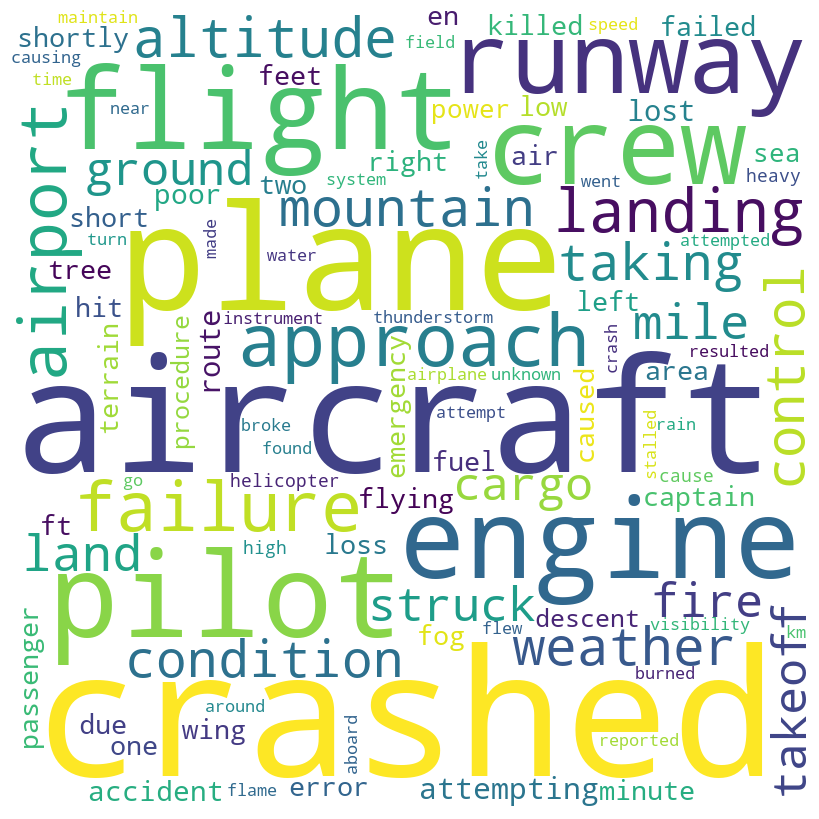

In [70]:
drop_duplicate_titles = df.drop_duplicates("resumen")
# Concatenamos los resumenes de los accidentes aereos
text = ' '.join(drop_duplicate_titles['resumen'].values)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, collocations=False)
# Generate the word cloud
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Mostramos un mapa de palabras al resumen de los accidentes y visualizamos cuales son las mas frecuentes

In [71]:
# Buscamos una correlación entre los valores númericos del datasets
df1 = df[['personal_total', 'pasajeros_a_bordo', 'tripulantes_a_bordo', 'cantidad_fallecidos', \
         'pasajeros_fallecidos', 'tripulantes_fallecidos', 'fallecidos_en_tierra']].corr()
df1

,personal_total,pasajeros_a_bordo,tripulantes_a_bordo,cantidad_fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,fallecidos_en_tierra
personal_total,1.000000,0.985385,0.554504,0.739657,0.738239,0.314322,0.020559
pasajeros_a_bordo,0.985385,1.000000,0.520217,0.732699,0.749675,0.290121,0.019370
tripulantes_a_bordo,0.554504,0.520217,1.000000,0.431884,0.406665,0.732343,0.032320
cantidad_fallecidos,0.739657,0.732699,0.431884,1.000000,0.983945,0.558812,0.032614
pasajeros_fallecidos,0.738239,0.749675,0.406665,0.983945,1.000000,0.515647,0.030590
tripulantes_fallecidos,0.314322,0.290121,0.732343,0.558812,0.515647,1.000000,0.043772
fallecidos_en_tierra,0.020559,0.019370,0.032320,0.032614,0.030590,0.043772,1.000000


<AxesSubplot:>

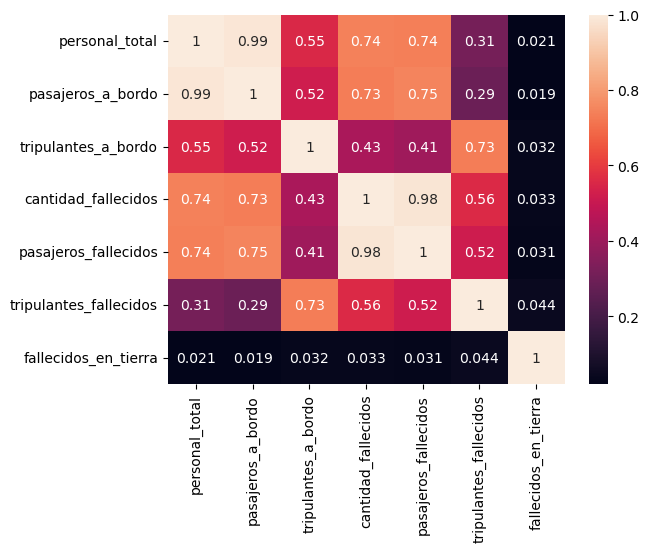

In [72]:
# Graficamos las correlaciones con el mapa de correlaciones en Seaborn
sns.heatmap(df1, annot=True)

# ANALIZAR CONJUNTOS DE DATOS

In [73]:
df.columns

Index(['fecha', 'hora', 'salida', 'operador', 'numero_vuelo', 'destino',
       'tipo_aeronave', 'registro', 'contro_interno', 'personal_total',
       'pasajeros_a_bordo', 'tripulantes_a_bordo', 'cantidad_fallecidos',
       'pasajeros_fallecidos', 'tripulantes_fallecidos',
       'fallecidos_en_tierra', 'resumen', 'mes', 'dia', 'año',
       'causa_accidente', 'aeronaves'],
      dtype='object')

In [112]:
# Ordenar el DataFrame por cantidad de fallecidos en tierra por el daño colateral en descendente.
top_10_cantidad_fallecidos = df.sort_values('fallecidos_en_tierra', ascending=False).head(10)

# Crear la figura del gráfico de barras
fig = go.Figure(data=go.Bar(x=top_10_cantidad_fallecidos['año'],
                           y=top_10_cantidad_fallecidos['fallecidos_en_tierra']))

# Personalizar el diseño del gráfico
fig.update_layout(title='Años con mayor cantidad de fallecidos en Tierra',
                  xaxis_title='Años',
                  yaxis_title='Cantidad de Personas Fallecidas en Tierra')

# Mostrar el gráfico
fig.show()

En este gráfico de barras nos muestra de manera clara los años con mayor cantidad de personas fallecidas en tierra por el daño colateral, mostrando en el eje X los años representados y en el eje Y la cantidad de personas.

In [105]:
# Obtener el año de la fecha de estreno
df['fecha_fallecidos'] = pd.to_datetime(df['año'])

# Contar la cantidad de fallecidos por año
fallecidos_por_año = df['fecha_fallecidos'].value_counts().reset_index()
fallecidos_por_año.columns = ['año', 'cantidad_fallecidos']

# Ordenar los años en orden ascendente
fallecidos_por_año = fallecidos_por_año.sort_values('año')

# Crear el gráfico de barras
fig = px.bar(fallecidos_por_año, x='año', y='cantidad_fallecidos')

# Personalizar el diseño del gráfico
fig.update_layout(title='Fallecidos por Año',
                  xaxis_title='Años',
                  yaxis_title='Cantidad de Personas')

# Mostrar el gráfico
fig.show()

+

In [97]:
# Agrupar los fallecidos por año
df_tendencia = df.groupby('año')['cantidad_fallecidos'].sum().reset_index()

# Crear el gráfico de tendencia
fig = px.line(df_tendencia, x='año', y='cantidad_fallecidos')

# Mostrar el gráfico
fig.show()

Este gráfico nos muestra la cantidad de personas fallecidas por año reflejando sus mayores perdidas de vida entre los años de 1972 y 1996 reflejando un descenso en los siguientes años

Este gráfico muestra a los 5 operadores aereos con mayor indice de accidentes aereos, llevandonos a la conclusion de que la Aeroflot de Rusia tiene el indice mas alto de cantidades de fallecidos seguido de la fuerza aerea de EEUU.

In [131]:
# Agrupar los fallecidos por año
df_tendencia = df.groupby('año')['fallecidos_en_tierra'].sum().reset_index()

# Crear el gráfico de tendencia
fig = px.line(df_tendencia, x='año', y='fallecidos_en_tierra')
fig.update_layout(
    xaxis=dict(title='Anos de Sucesos'),
    yaxis=dict(title='Cantidad de Personas'),
    title='Personas Fallecidas en Tierra por Daño Colateral',
    showlegend=True,
    plot_bgcolor='white',
    xaxis_showgrid=True,
    yaxis_showgrid=True,)

# Mostrar el gráfico
fig.show()

Esta gráfica nos muestra el daño a terceras personas que no estaban dentro de la aeronave.
Se observa que el año con mayor frecuencia de fallecidos en tierra fue el 2021.

In [99]:
# Obtener los 5 operadores aerreos con mayor cantidad de fallecidos
top_5_operadores = df['operador'].value_counts().head(5)

# Crear el gráfico de dona
fig = px.pie(names=top_5_operadores.index, values=top_5_operadores.values)

# Configurar el diseño del gráfico
fig.update_traces(hole=0.4, textinfo='percent+label')

# Mostrar el gráfico
fig.show()

In [124]:
fig = go.Figure()
fig.add_trace(go.Scatter(x='año', y='cantidad_fallecidos', mode='lines', name='Línea'))
fig.add_trace(go.Scatter(x='año', y='fallecidos_en_tierra', mode='markers', marker=dict(color='cyan'), name='Puntos'))

fig.update_layout(
    xaxis=dict(title='Datos de la coordenada X'),
    yaxis=dict(title='Datos de la coordenada Y'),
    title='Este es el nombre de la gráfica',
    showlegend=True,
    plot_bgcolor='white',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
)

fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'x' property of scatter
        Received value: 'año'

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [133]:
# Obtener los 5 operadores aerreos con mayor cantidad de fallecidos
aeronave = df['aeronaves'].value_counts().head(5)

# Crear el gráfico de dona
fig = px.pie(names=aeronave.index, values=aeronave.values)

# Configurar el diseño del gráfico
fig.update_traces(hole=0.4, textinfo='percent+label')

# Mostrar el gráfico
fig.show()

c:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='aeronaves', ylabel='count'>

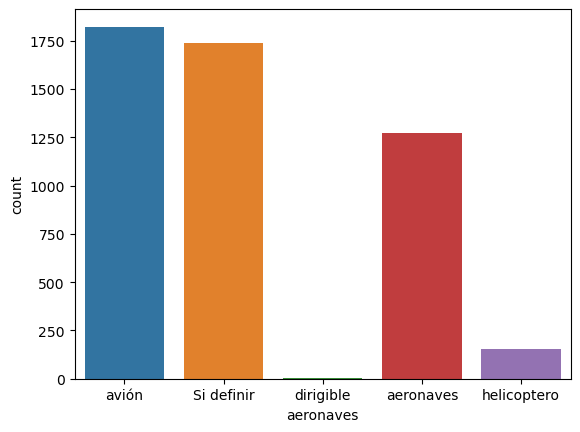

In [138]:
#Count-plot ( Bar-plot ) para la variable categórica
sns.countplot(df['aeronaves'])